# Finding the best predicator for California Housing Price

In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


### Importing the dataset

In [137]:
df_houseprice=pd.read_csv("/Users/frankzhong/Downloads/ECO225/ECO225PROJECT/Data/housing.csv")
df_houseprice

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


## Data Cleaning

### 1) Check for missing values

In [138]:
df_houseprice.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [139]:
df_houseprice[df_houseprice.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


### 2) Impute the missing values using the average based on location of the house with respect to ocean


In [140]:
print(df_houseprice['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [141]:
#Create a new dataframe with only columns of 'total_bedrooms' and 'ocean_proximity'
new_house = df_houseprice[['total_bedrooms', 'ocean_proximity']]
new_house

,total_bedrooms,ocean_proximity
0,129.0,NEAR BAY
1,1106.0,NEAR BAY
2,190.0,NEAR BAY
3,235.0,NEAR BAY
4,280.0,NEAR BAY
...,...,...
20635,374.0,INLAND
20636,150.0,INLAND
20637,485.0,INLAND
20638,409.0,INLAND


In [142]:
#Computed the average total bedrooms within a block based on location of the house with respect to ocean
result = new_house.groupby('ocean_proximity').mean()
result

,total_bedrooms
ocean_proximity,
<1H OCEAN,546.539185
INLAND,533.881619
ISLAND,420.400000
NEAR BAY,514.182819
NEAR OCEAN,538.615677


In [164]:
#Imputed the average to the new_house dataframe
for i in range(len(new_house)):
    if pd.isnull(new_house['total_bedrooms'][i]):
        new_house['total_bedrooms'][i] = result['total_bedrooms'][new_house['ocean_proximity'][i]]

In [144]:
new_house.isnull().sum()

total_bedrooms     0
ocean_proximity    0
dtype: int64

In [145]:
#Merge the imputed column to the original dataframe
df_houseprice['total_bedrooms'] = new_house['total_bedrooms']
df_houseprice.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Summary Statistic

In [146]:
df_houseprice.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.880892,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.267735,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 3) Dropping the geographic columns and conduct house value analysis using the rest of the explanetory variables

In [147]:
df_predict_price = df_houseprice.drop(columns=['longitude', 'latitude', 'ocean_proximity'])
df_predict_price

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100
20636,18,697,150.0,356,114,2.5568,77100
20637,17,2254,485.0,1007,433,1.7000,92300
20638,18,1860,409.0,741,349,1.8672,84700


### 4) Dropping the "total_bedrooms" column because it is highly correlated with the "total_rooms" column

In [148]:
room_correlation = df_predict_price['total_rooms'].corr(df_predict_price['total_bedrooms'])
print("The correlation between total_rooms and total_bedrooms is: ", room_correlation)

The correlation between total_rooms and total_bedrooms is:  0.9272521715028144


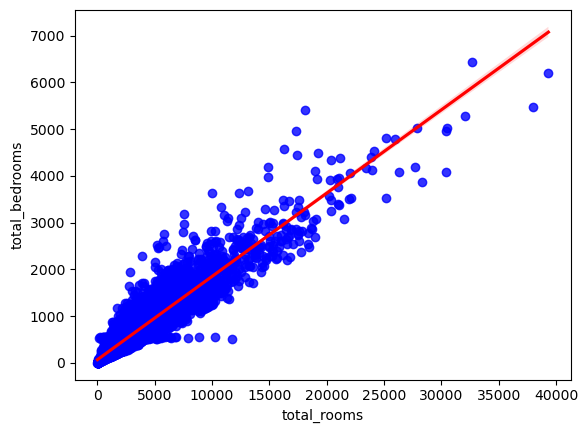

In [149]:
#Correlation Graph
rooms_cor = sns.regplot(x=df_predict_price.total_rooms, y=df_predict_price.total_bedrooms, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


In [150]:
df_prepared = df_predict_price.drop(columns = ['total_bedrooms'])
df_prepared

,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,41,880,322,126,8.3252,452600
1,21,7099,2401,1138,8.3014,358500
2,52,1467,496,177,7.2574,352100
3,52,1274,558,219,5.6431,341300
4,52,1627,565,259,3.8462,342200
...,...,...,...,...,...,...
20635,25,1665,845,330,1.5603,78100
20636,18,697,356,114,2.5568,77100
20637,17,2254,1007,433,1.7000,92300
20638,18,1860,741,349,1.8672,84700


### 5) Remove Outliers

In [151]:
#Standardize
standardized = (df_predict_price - df_predict_price.mean()) / df_predict_price.std()

standardized

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.982119,-0.804800,-0.975226,-0.974405,-0.977009,2.344709,2.129580
1,-0.607004,2.045841,1.355027,0.861418,1.669921,2.332181,1.314124
2,1.856137,-0.535733,-0.829734,-0.820757,-0.843616,1.782656,1.258663
3,1.856137,-0.624199,-0.722404,-0.766010,-0.733764,0.932945,1.165072
4,1.856137,-0.462393,-0.615074,-0.759828,-0.629142,-0.012881,1.172871
...,...,...,...,...,...,...,...
20635,-0.289180,-0.444974,-0.390874,-0.512579,-0.443438,-1.216099,-1.115777
20636,-0.845373,-0.888682,-0.925139,-0.944382,-1.008396,-0.691576,-1.124443
20637,-0.924829,-0.174991,-0.126127,-0.369528,-0.174037,-1.142566,-0.992722
20638,-0.845373,-0.355591,-0.307395,-0.604415,-0.393743,-1.054557,-1.058583


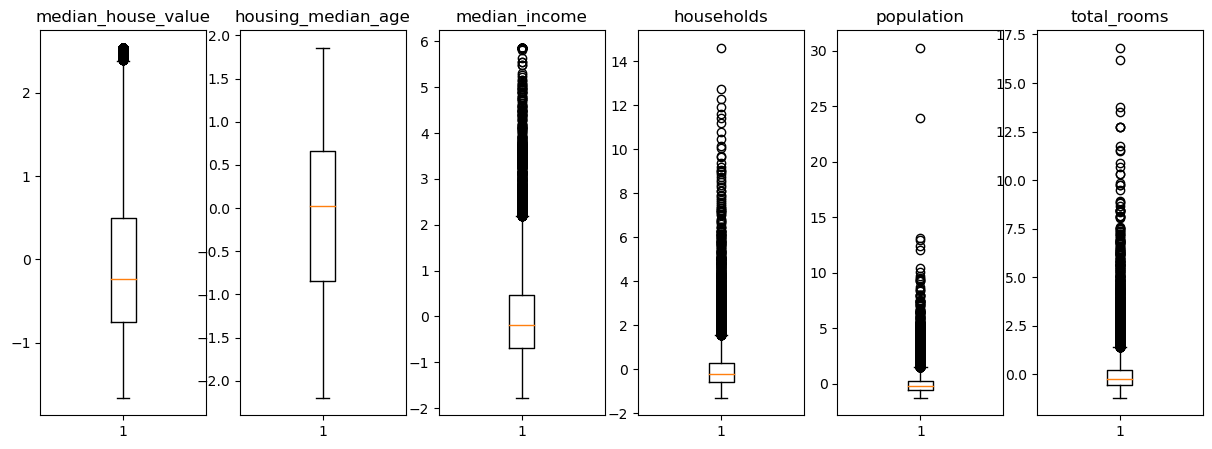

In [152]:
#Visualize the six boxplots

fig, ax = plt.subplots(1, 6, figsize=(15, 5))


ax[0].boxplot(standardized['median_house_value'])
ax[0].set_title('median_house_value')

ax[1].boxplot(standardized['housing_median_age'])
ax[1].set_title('housing_median_age')

ax[2].boxplot(standardized['median_income'])
ax[2].set_title('median_income')

ax[3].boxplot(standardized['households'])
ax[3].set_title('households')

ax[4].boxplot(standardized['population'])
ax[4].set_title('population')

ax[5].boxplot(standardized['total_rooms'])
ax[5].set_title('total_rooms')

plt.show()

### Check for outliers 

In [184]:
def check_outliers(df, threshold=3):
    mean = df.mean()
    std = df.std()
    z = (df - mean) / std
    outliers = df[(np.abs(z) > threshold).any(axis=1)]
    return outliers

outliers = check_outliers(standardized)

outliers.max()

housing_median_age     1.856137
total_rooms           16.815173
total_bedrooms        14.089134
population            30.249597
households            14.601166
median_income          5.858144
median_house_value     2.540349
dtype: float64

In [185]:
df_no_outliers = standardized.drop(outliers.index, axis=0)
df_no_outliers.max()

housing_median_age    1.856137
total_rooms           2.999263
total_bedrooms        2.964977
population            2.995706
households            2.993385
median_income         2.992612
median_house_value    2.540349
dtype: float64

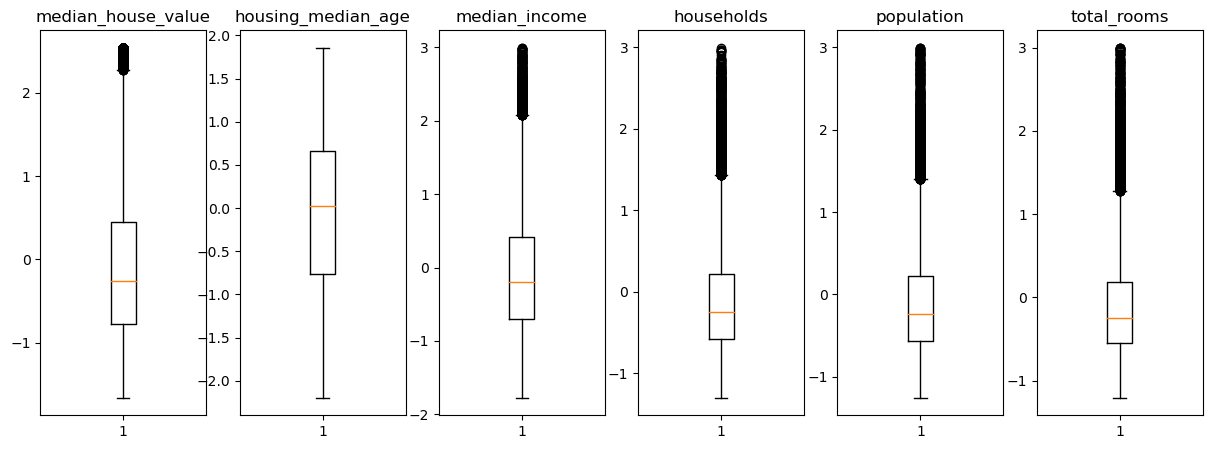

In [186]:
#Visualize the six boxplots

fig, ax = plt.subplots(1, 6, figsize=(15, 5))


ax[0].boxplot(df_no_outliers['median_house_value'])
ax[0].set_title('median_house_value')

ax[1].boxplot(df_no_outliers['housing_median_age'])
ax[1].set_title('housing_median_age')

ax[2].boxplot(df_no_outliers['median_income'])
ax[2].set_title('median_income')

ax[3].boxplot(df_no_outliers['households'])
ax[3].set_title('households')

ax[4].boxplot(df_no_outliers['population'])
ax[4].set_title('population')

ax[5].boxplot(df_no_outliers['total_rooms'])
ax[5].set_title('total_rooms')

plt.show()

In [156]:
# a = (df_no_outliers['median_house_value'] <= o_high['median_house_value']) & (df_no_outliers['median_house_value'] >= o_low['median_house_value'])
# b = (df_no_outliers['housing_median_age'] <= o_high['housing_median_age']) & (df_no_outliers['housing_median_age'] >= o_low['housing_median_age'])
# c = (df_no_outliers['median_income'] <= o_high['median_income']) & (df_no_outliers['median_income'] >= o_low['median_income'])

# condition = a & b & c
# df_no_outliers2 = df_no_outliers[condition]
# df_no_outliers2.max()


### 6) Transform standardized dataframe back to unstandardized dataframe

In [157]:
keep = df_no_outliers.index
keep

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            20630, 20631, 20632, 20633, 20634, 20635, 20636, 20637, 20638,
            20639],
           dtype='int64', length=19746)

In [158]:
df_finalized = df_prepared.loc[keep]
df_finalized.max()

housing_median_age        52.0000
total_rooms             9179.0000
population              4818.0000
households              1644.0000
median_income              9.5561
median_house_value    500001.0000
dtype: float64

### 4) Plots

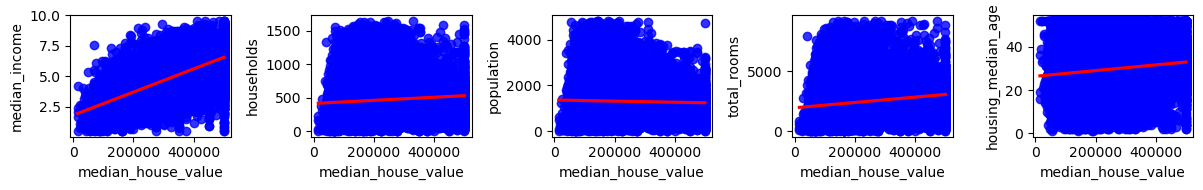

In [159]:
import seaborn as sns
fig, ax = plt.subplots(1, 5, figsize=(12, 2))



sns.regplot(x=df_finalized.median_house_value, y=df_finalized.median_income, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[0])


sns.regplot(x=df_finalized.median_house_value, y=df_finalized.households, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[1])


sns.regplot(x=df_finalized.median_house_value, y=df_finalized.population, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[2])


sns.regplot(x=df_finalized.median_house_value, y=df_finalized.total_rooms, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ax=ax[3])


sns.regplot(x=df_finalized.median_house_value, y=df_finalized.housing_median_age, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ax=ax[4])



plt.tight_layout()

plt.show()


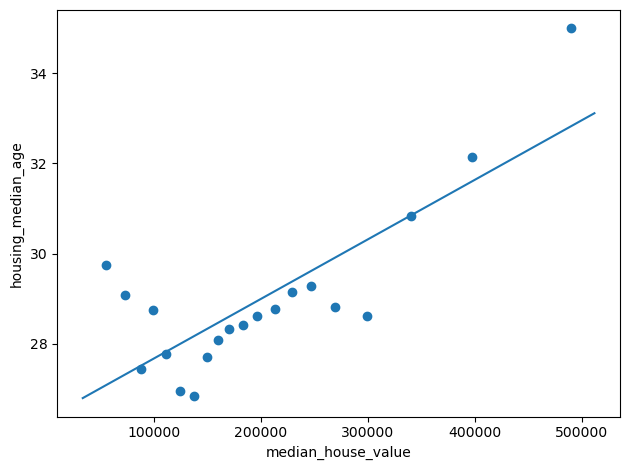

In [215]:
#Elizabeth Santorella
import binscatter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

# Binned scatter plot 
ax.binscatter(df_finalized["median_house_value"], df_finalized["housing_median_age"])



plt.tight_layout()
plt.show()

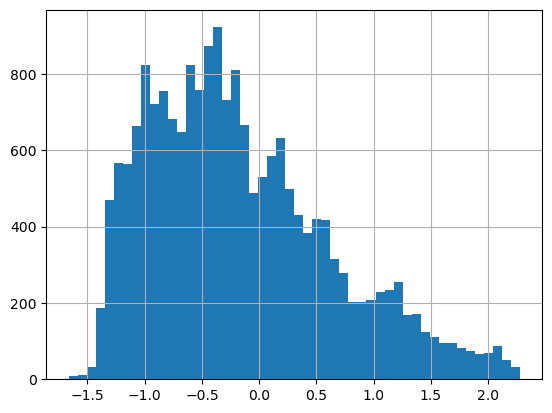

In [161]:
df_no_outliers2['median_house_value'].hist(bins=50)
plt.show()

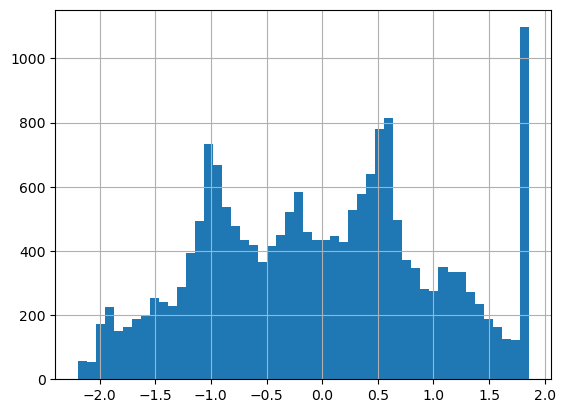

In [162]:
df_no_outliers2['housing_median_age'].hist(bins=50)
plt.show()

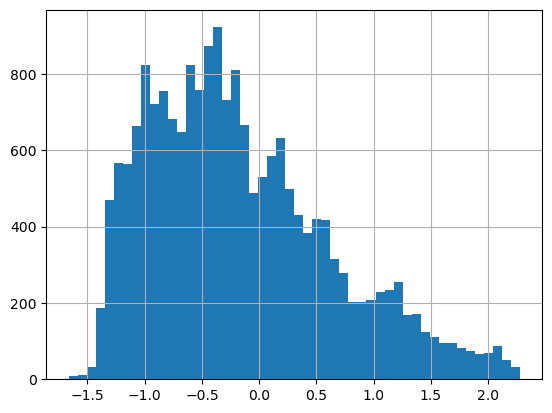

In [163]:
df_no_outliers2['median_house_value'].hist(bins=50)
plt.show()

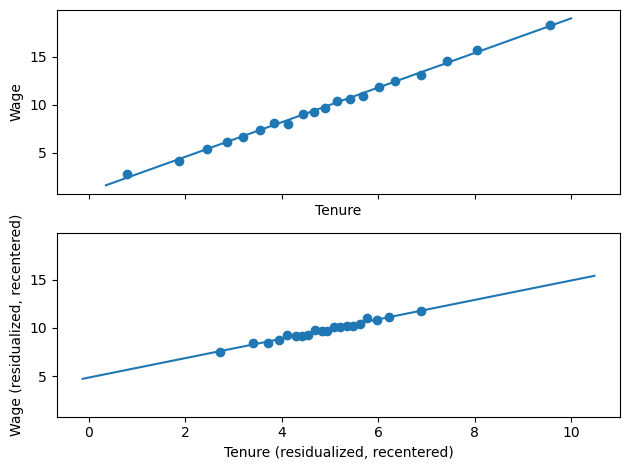

In [191]:
import binscatter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Create fake data
n_obs = 1000
data = pd.DataFrame({"experience": np.random.poisson(4, n_obs) + 1})
data["Tenure"] = data["experience"] + np.random.normal(0, 1, n_obs)
data["Wage"] = data["experience"] + data["Tenure"] + np.random.normal(0, 1, n_obs)

fig, axes = plt.subplots(2, sharex=True, sharey=True)

# Binned scatter plot of Wage vs Tenure
axes[0].binscatter(data["Tenure"], data["Wage"])

# Binned scatter plot that partials out the effect of experience
axes[1].binscatter(
    data["Tenure"],
    data["Wage"],
    controls=data["experience"],
    recenter_x=True,
    recenter_y=True,
)
axes[1].set_xlabel("Tenure (residualized, recentered)")
axes[1].set_ylabel("Wage (residualized, recentered)")

plt.tight_layout()
plt.show()